In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
# THIS WILL DOWNLOAD THE IMAGES, not important really

!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip --ssl-no-revoke
!tar -xf kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  786M    1 14.6M    0     0  20.9M      0  0:00:37 --:--:--  0:00:37 20.9M
  4  786M    4 36.7M    0     0  21.4M      0  0:00:36  0:00:01  0:00:35 21.4M
  8  786M    8 63.5M    0     0  23.5M      0  0:00:33  0:00:02  0:00:31 23.5M
 12  786M   12 97.9M    0     0  26.4M      0  0:00:29  0:00:03  0:00:26 26.4M
 17  786M   17  133M    0     0  28.4M      0  0:00:27  0:00:04  0:00:23 28.4M
 20  786M   20  162M    0     0  28.5M      0  0:00:27  0:00:05  0:00:22 29.5M
 24  786M   24  193M    0     0  28.9M      0  0:00:27  0:00:06  0:00:21 31.4M
 28  786M   28  222M    0     0  28.8M      0  0:00:27  0:00:07  0:00:20 31.7M
 31  786M   31  251M    0     0  28.8M      0  0:00:27  0:00:08  0:00:19 30.6M
 35  786M   35  278M    0     0  28.6M      0  0:00

In [15]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 5EC9-8460

 Directory of C:\Users\Caleb\Documents\Python Scripts

08/09/2021  08:40 PM    <DIR>          .
08/09/2021  08:40 PM    <DIR>          ..
08/09/2021  08:29 PM    <DIR>          .ipynb_checkpoints
06/07/2021  09:56 AM             2,705 BlobConn.ipynb
01/10/2021  03:32 AM             1,726 fetchTweets.py
06/08/2021  11:42 AM            34,874 flight monitors.ipynb
08/09/2021  08:40 PM       824,894,548 kagglecatsanddogs_3367a.zip
08/09/2021  08:39 PM             6,145 Keras - Image Recognition from Scratch.ipynb
02/10/2017  10:55 AM            35,545 MSR-LA - 3467.docx
08/09/2021  08:38 PM    <DIR>          PetImages
06/04/2021  02:59 PM             3,611 pplmvmnt.ipynb
02/10/2017  10:51 AM               104 readme[1].txt
               8 File(s)    824,979,258 bytes
               4 Dir(s)  567,633,899,520 bytes free


In [17]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images")

Deleted 0 images


In [19]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


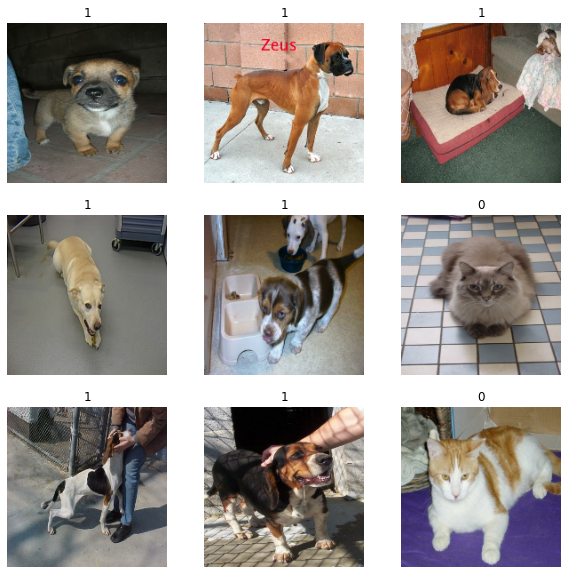

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")